In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data_files=['Amazon','AMD','Apple','Cisco','Meta','Microsoft','Netflix','Qualcomm','Starbucks','Tesla']

In [4]:
data=[]

for i in data_files:
    temp=pd.read_csv('Dataset/{}.csv'.format(i),parse_dates=True,index_col=0,usecols=['Date','Close/Last'])
    temp.sort_index(ascending=True,inplace=True)
    temp.rename(columns={'Close/Last':"Close"},inplace=True)
    temp.name=i
    data.append(temp)

In [5]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
mse_errors=[]
mape_errors=[]
forecast=[]

In [8]:
def ForestReg(df):
    test=30
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    df['Lag_3'] = df['Close'].shift(3)
    df['Lag_4'] = df['Close'].shift(4)
    df['Lag_5'] = df['Close'].shift(5)
    df['Lag_6'] = df['Close'].shift(6)
    df['Lag_7'] = df['Close'].shift(7)
    
    df.dropna(inplace=True)
    Xtrain=np.array(df.iloc[:-test,1: ])
    Xtest=np.array(df.iloc[-test:,1:])
    Ytrain=df.iloc[:-test,0 ]
    Ytest=df.iloc[-test:,0 ]  

    model = DecisionTreeRegressor()
    model.fit(Xtrain,Ytrain)
    result=model.predict(Xtest)
    
    plt.plot(Ytest.values,label='actual')
    plt.plot(result,label='predicted')
    plt.legend(loc='best')
    plt.show()
    
    #one-step forecast
    step=np.array(Ytest[-7:].values[::-1])
    forecast=model.predict(pd.DataFrame(step).T)
    return mean_squared_error(result,Ytest),mean_absolute_percentage_error(result,Ytest),forecast[0]

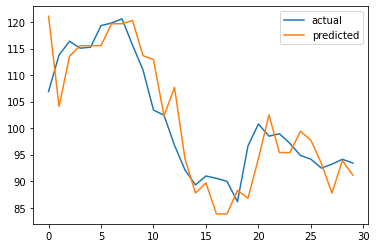

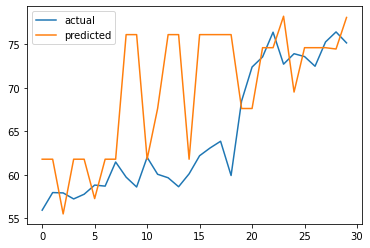

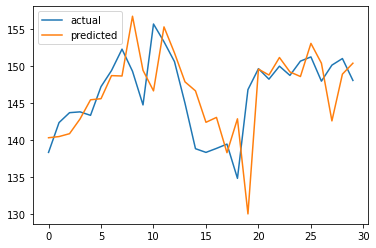

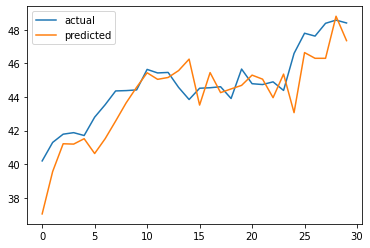

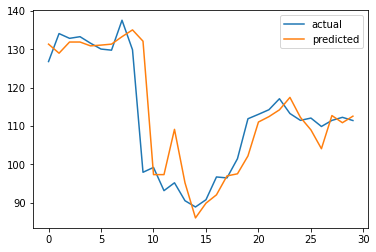

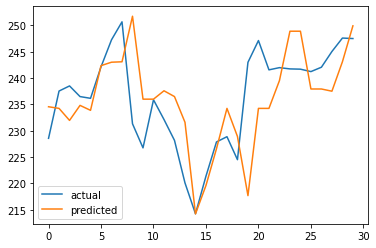

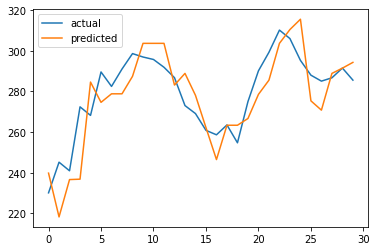

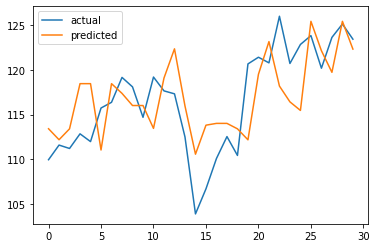

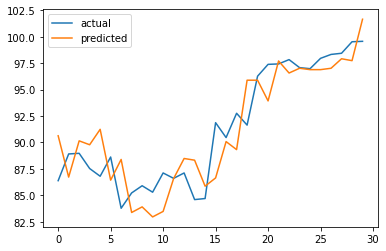

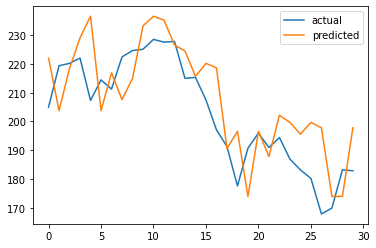

In [9]:
for i in data:
    mse,mape,f=ForestReg(i.copy())
    mse_errors.append(mse)
    mape_errors.append(mape)
    forecast.append(f)

In [10]:
df=pd.DataFrame({"mse":mse_errors,"mape":mape_errors,"one-step forecast":forecast},index=data_files)

In [11]:
df

,mse,mape,one-step forecast
Amazon,29.720107,0.040724,93.08
AMD,72.712090,0.085019,69.50
Apple,24.539307,0.024484,150.02
Cisco,1.986807,0.025806,47.24
Meta,57.353713,0.037937,109.64
Microsoft,67.898913,0.026003,249.90
Netflix,167.495260,0.039131,288.59
Qualcomm,18.674473,0.031467,127.46
Starbucks,6.679680,0.023353,100.11
Tesla,181.285020,0.053361,197.79
